### Author: Celine Combet
### Date Created: 5 Oct 2018
## This example jupyer notebook uses clmm code to generate mock data with a set of configuration parmeters, producing a catalog of ideal and noisy example data.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

### Import mock data module and setup the configuration 

In [2]:
import clmm.mock_data as mock

### Mock data generation requires a config dictionary

In [3]:
config={}
config['cluster_m'] = 1.e15
config['cluster_z'] = 0.3
config['src_z'] = 0.8
config['concentration'] = 4
config['cosmo'] = 'WMAP7-ML'
config['ngals'] = 10000
config['mdef'] = '200c'

ideal_data = mock.MockData(config=config)
noisy_data = mock.MockData(config=config)
noisy_data_z = mock.MockData(config=config)

### Generate the mock catalog from the configuration. Consider 3 examples of increasing complexity:
* Ideal data, no noise, all galaxies at the same redshift
* Noisy data, including shape noise and redshift error, all galaxies at the same redshift
* Noisy data, galaxies following redshift distribution, redshift error, shape noise

In [4]:
ideal_data.generate()
noisy_data.generate(is_shapenoise=True, shapenoise=0.005, is_zerr=True)
noisy_data_z.generate(is_shapenoise=True, is_zdistribution=True, is_zerr=True)


#### Ideal catalog first entries: no noise on the shape measurement, all galaxies at z=0.3

In [5]:
ideal_data.catalog[0:5]

id,ra,dec,gamma1,gamma2,z
int64,float64,float64,float64,float64,float64
0,0.27165354127368607,-0.3034057469316508,0.0005168923817971281,-0.0046664087666106555,0.8
1,0.27400766042729174,-0.2647148713300239,-0.00017850898580447694,-0.005172731093196827,0.8
2,-0.32741731178090644,0.08055227092662533,-0.005469215258957591,-0.002864488363719525,0.8
3,0.21314684585211477,-0.34324808148701924,0.0021061053667871007,-0.004257283152917245,0.8
4,-0.0983222265074265,0.17731101113768663,0.006564929217899137,-0.010513575471805765,0.8


#### More realistic catalog: noise has been added on the shape measurement, galaxies follow some photoz distribution, gaussian pdf for each photoz is also provided (along with corresponding bins)

In [8]:
noisy_data_z.catalog[0:2]

id,ra,dec,gamma1,gamma2,z,z_pdf [34],z_bins [34]
int64,float64,float64,float64,float64,float64,float64,float64
0,0.1512607403755406,-0.25926948659884846,0.007380079918642595,-0.013054631758154559,0.8066539963384555,9.823516455232908e-07 .. 1.8018464633260682e-06,0.30665399633845547 .. 1.2966539963384562
1,0.015132707800109642,0.32535677155273196,0.009229535879408226,0.0008604134179579408,2.460576825964658,0.035444028153144326 .. 0.04181650319718765,1.960576825964658 .. 2.950576825964659


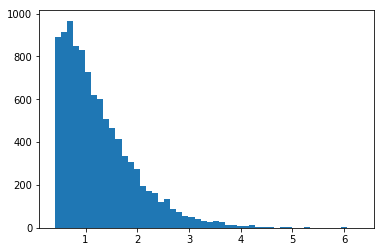

In [9]:
# Histogram of the redshift distribution of bkg galaxies (starting at z_cluster + 0.1)
hist = plt.hist(noisy_data_z.catalog['z'], bins=50)

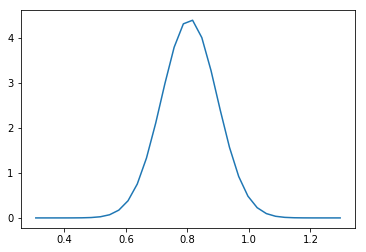

In [10]:
# pdz for the first galaxy in the catalog
plt.plot(noisy_data_z.catalog['z_bins'][0],noisy_data_z.catalog['z_pdf'][0])

### Compute and plot shear profile

In [11]:
from clmm import ShearAzimuthalAverager

In [12]:
cl_dict = {'z':config['cluster_z'], 'ra':0.0, 'dec': 0.0}

saa_ideal = ShearAzimuthalAverager(cl_dict,ideal_data.catalog)
saa_noisy = ShearAzimuthalAverager(cl_dict,noisy_data.catalog)
saa_noisy_z = ShearAzimuthalAverager(cl_dict,noisy_data_z.catalog)


saa_ideal.compute_shear()
saa_noisy.compute_shear()
saa_noisy_z.compute_shear()

saa_ideal.make_shear_profile()
saa_noisy.make_shear_profile()
saa_noisy_z.make_shear_profile()

/pbs/throng/lsst/software/desc/anaconda3/lib/python3.7/site-packages/astropy/table/row.py:65: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  return self.as_void() == other


read g1, g2 directly
read g1, g2 directly
read g1, g2 directly


radius,ang_separation,g_t,g_x,g_t_err,g_x_err
Mpc,rad,,,,
float64,float64,float64,float64,float64,float64
0.88915542562763,0.0009677704979179245,0.057531079010107844,1.0803642886890957e-18,0.015219502895253784,7.673844092291507e-18
1.1387202725826757,0.001239400731777221,0.04409849735286504,-5.413970588580214e-19,0.013016894600934133,9.042249298919472e-18
1.377587213716092,0.0014993871997151997,0.03614774222990198,6.664654530866778e-20,0.010310917588762281,6.998167293411909e-18
1.6305291361581802,0.0017746930946922297,0.030712601054798495,2.699608926967676e-19,0.0094171903467527,4.597789666825573e-18
1.8842255473958571,0.0020508201869271687,0.026810456310126643,-2.3875989743262063e-19,0.007606718342481012,4.226603592795867e-18
2.1306879875297318,0.002319073713286818,0.02341016996183596,-4.238874369617141e-20,0.007784209980671022,4.057543853827611e-18
2.3767204596810525,0.0025868592558535644,0.019610065275010528,1.5395900553144266e-19,0.007031580262165162,3.3496350089157373e-18
2.622339324625925,0.002854194621948809,0.017295477352252744,-3.5726639668118884e-20,0.007583411975096928,3.100002205385866e-18


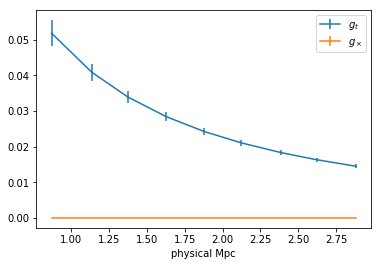

In [13]:
# Ideal data
saa_ideal.plot_profile()

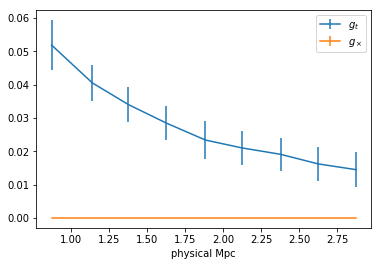

In [14]:
# Noisy data, all galaxies at the same redshift
saa_noisy.plot_profile()

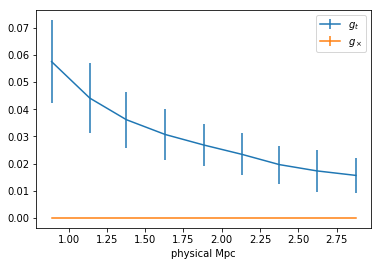

In [15]:
# Noisy data, galaxies following redshift distribution
saa_noisy_z.plot_profile()